## PROJECT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [ ]:
a=pd.read_csv(r"Fraud.csv")

In [ ]:
m=pd.DataFrame(a)

In [ ]:
m.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
m.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5397819,377,CASH_OUT,16377.00,C1109005909,0.00,0.00,C1181335335,152240.45,168617.45,0,0
1971225,178,CASH_OUT,87770.02,C2004520573,0.00,0.00,C1015783883,766254.34,1190063.23,0,0
1102122,130,CASH_IN,192222.13,C1156480753,4617384.05,4809606.18,C921130916,225903.80,33681.67,0,0
419109,18,CASH_IN,490271.67,C224997526,387.00,490658.67,C1258007166,591978.46,101706.78,0,0
1968506,178,TRANSFER,122066.39,C610368152,6050.00,0.00,C40866333,354881.39,476947.78,0,0


In [ ]:
m.tail(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


1] The feature HEAD,SAMPLE,TAIL showing three types of values NUMERICAL(amount,oldbalanceOrg,oldbalanceDest,oldbalanceDest),CATEGORICAL(type) and BINARY (Is fraud,isFlaggedFraud)
2] Head(5) showing top 5 rows of dataset
3]Sample(5) showing any 5 random rows of dataset
4]Tail(5) showing the bottom 5 rows of dataset

In [ ]:
m.shape

(6362620, 11)

Total of 63626260 rows and 11 columns are present in the dataset

In [ ]:
m.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


there are missing value in columns (newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud)

In [ ]:
m=m.dropna()

After applying dropna(). rows with missing values were removed.

In [ ]:
m.dtypes

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


After checking dtypes as we can see there are two columns with dtype object which needs to be converted

In [ ]:
m.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

with the help of columns we can observe some of the columns are not necessary for building model

In [ ]:
m.drop("step",axis=1,inplace=True)

In [ ]:
m.drop("nameOrig",axis=1,inplace=True)

In [ ]:
m.drop("nameDest",axis=1,inplace=True)

With the help of drop function we have dropped columns which are not necessary

In [ ]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 388.3+ MB


As we can see there is still one column who's dtype is object so we need to convert into numerical

In [ ]:
le=LabelEncoder()

In [ ]:
m["type"]=le.fit_transform(m["type"])

With the help of label encoder we have converted the column into numerical

In [ ]:
m.describe()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.714150e+00,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.350117e+00,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,4.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In most of the columns the mean is greater then median but As we can see there is negative skewness present in columns like "amount",newbalanceDest

In [ ]:
m.skew()

,0
type,0.196530
amount,30.993949
oldbalanceOrg,5.249136
newbalanceOrig,5.176884
oldbalanceDest,19.921758
newbalanceDest,19.352302
isFraud,27.779538
isFlaggedFraud,630.603629


In [ ]:
m["amount"]=np.log1p(m["amount"])

In [ ]:
m["oldbalanceOrg"]=np.log1p(m["oldbalanceOrg"])

In [ ]:
m["newbalanceOrig"]=np.log1p(m["newbalanceOrig"])

In [ ]:
m["oldbalanceDest"]=np.log1p(m["oldbalanceDest"])

In [ ]:
m["newbalanceDest"]=np.log1p(m["newbalanceDest"])

In [ ]:
m.skew()

,0
type,0.196530
amount,-0.555018
oldbalanceOrg,-0.259723
newbalanceOrig,0.440148
oldbalanceDest,-0.213261
newbalanceDest,-0.386937
isFraud,27.779538
isFlaggedFraud,630.603629


with the help og nplog1p we have dealth with negative skewness

In [ ]:
m

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3,9.194276,12.044359,11.984786,0.000000,0.000000,0,0
1,3,7.531166,9.964112,9.872292,0.000000,0.000000,0,0
2,4,5.204007,5.204007,0.000000,0.000000,0.000000,1,0
3,1,5.204007,5.204007,0.000000,9.960954,0.000000,1,0
4,3,9.364703,10.634773,10.305174,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...
6362615,1,12.735768,12.735768,0.000000,0.000000,12.735768,1,0
6362616,4,15.657870,15.657870,0.000000,0.000000,0.000000,1,0
6362617,1,15.657870,15.657870,0.000000,11.134441,15.668663,1,0
6362618,4,13.652996,13.652996,0.000000,0.000000,0.000000,1,0


In [ ]:
m.isnull().sum()

,0
type,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0
isFlaggedFraud,0


,0
type,"Axes(0.125,0.77;0.110714x0.11)"
amount,"Axes(0.257857,0.77;0.110714x0.11)"
oldbalanceOrg,"Axes(0.390714,0.77;0.110714x0.11)"
newbalanceOrig,"Axes(0.523571,0.77;0.110714x0.11)"
oldbalanceDest,"Axes(0.656429,0.77;0.110714x0.11)"
newbalanceDest,"Axes(0.789286,0.77;0.110714x0.11)"
isFraud,"Axes(0.125,0.638;0.110714x0.11)"
isFlaggedFraud,"Axes(0.257857,0.638;0.110714x0.11)"


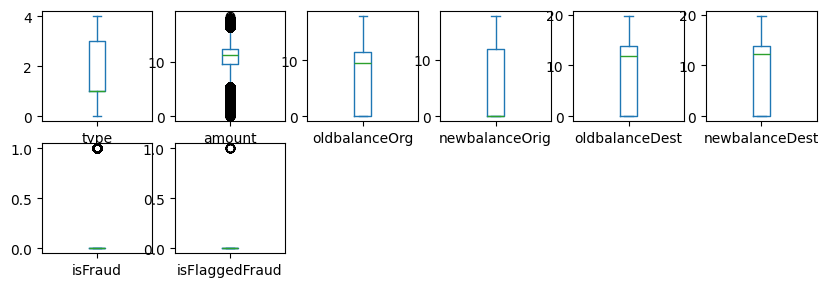

In [ ]:
m.plot(kind="box",subplots=True,layout=(6,6),figsize=(10,10))

In [ ]:
from scipy.stats import zscore

In [ ]:
m.shape

(6362620, 8)

In [ ]:
df=m[np.abs(zscore(m['amount'])) < 3]

With the help of zscore technique we have dealt with outliers

In [ ]:
df.shape

(6329527, 8)

,0
type,"Axes(0.125,0.77;0.110714x0.11)"
amount,"Axes(0.257857,0.77;0.110714x0.11)"
oldbalanceOrg,"Axes(0.390714,0.77;0.110714x0.11)"
newbalanceOrig,"Axes(0.523571,0.77;0.110714x0.11)"
oldbalanceDest,"Axes(0.656429,0.77;0.110714x0.11)"
newbalanceDest,"Axes(0.789286,0.77;0.110714x0.11)"
isFraud,"Axes(0.125,0.638;0.110714x0.11)"
isFlaggedFraud,"Axes(0.257857,0.638;0.110714x0.11)"


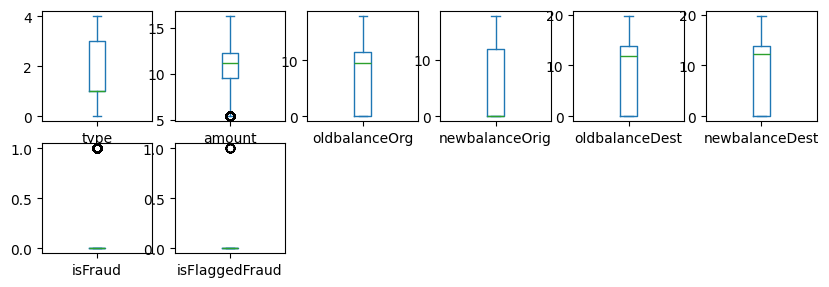

In [ ]:
df.plot(kind="box",subplots=True,layout=(6,6),figsize=(10,10))

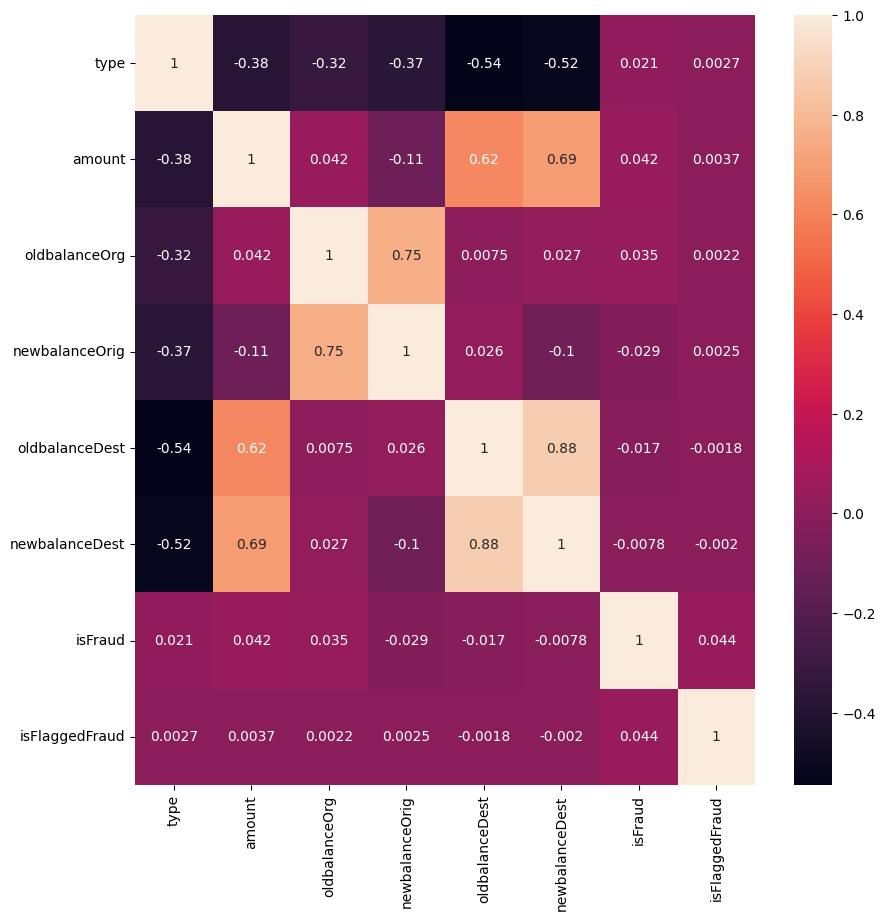

In [ ]:
cor=df.corr()
plt.figure(figsize=(10,10))
sb.heatmap(cor,annot=True)
plt.show()

there is strong corelation with newbalanceDest and less corelation with oldbalanceDest also isFlaggedFraud is not contributing anything so we will get rid of it

In [ ]:
df.drop("isFlaggedFraud",axis=1,inplace=True)

In [ ]:
df.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [ ]:
s=df.loc[:,['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest','isFraud']]

In [ ]:
s.shape

(6329527, 7)

In [ ]:
m=pd.DataFrame(s)

In [ ]:
x=m.iloc[:,:-1]
y=m.iloc[:,-1]

In [ ]:
sm=SMOTE()

In [ ]:
xtrain,ytrain=sm.fit_resample(x,y)

In [ ]:
ytrain.value_counts()

,count
isFraud,
0,6321350
1,6321350


<Axes: xlabel='isFraud', ylabel='count'>

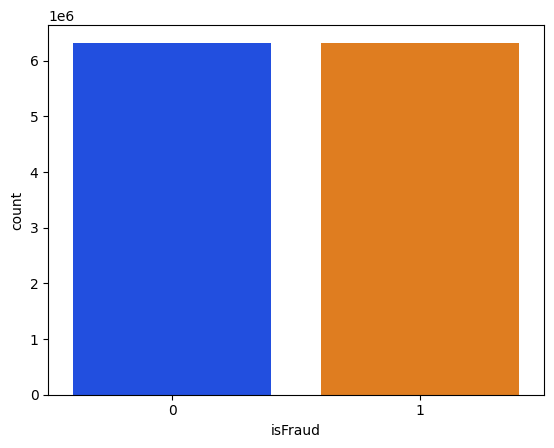

In [ ]:
ytrain.shape
sb.countplot(x=ytrain,palette="bright")

with the help of smote technique we have dealt with imbalance data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(xtrain,ytrain,test_size=.30,random_state=42)

In [ ]:
import pickle


In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
model = lgb.LGBMClassifier(
    n_estimators=100,    # number of trees
    max_depth=10,        # depth of each tree
    learning_rate=0.1    # step size
)

In [ ]:
model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 4425022, number of negative: 4424868
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.960015 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1280
[LightGBM] [Info] Number of data points in the train set: 8849890, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500009 -> initscore=0.000035
[LightGBM] [Info] Start training from score 0.000035


LGBMClassifier(max_depth=10)

In [ ]:
pred=model.predict(x_test)

In [ ]:
print("the accuracy score for is",accuracy_score(y_test,pred))


the accuracy score for is 0.9973808337354099


In [ ]:
print("the confusion_matrix for is\n",confusion_matrix(y_test,pred))

the confusion_matrix for is
 [[1889139    7343]
 [   2591 1893737]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1896482
           1       1.00      1.00      1.00   1896328

    accuracy                           1.00   3792810
   macro avg       1.00      1.00      1.00   3792810
weighted avg       1.00      1.00      1.00   3792810



In [ ]:
# Save the trained model
with open("lgb_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [ ]:
def fraudd(f):
    f=f.reshape(1,-1)
    pro=model.predict(f)
    print("the score of ",pro)
    if pro == 0:
        print("its not a fraud transaction")
    else:
        print("its a fraud transaction")

In [ ]:
f=np.array([3,9.194276,12.044359,11.984786,0.000000,0.000000])

In [ ]:
fraudd(f)

the score of  [0]
its not a fraud transaction


In [98]:
fraud_data = m[m['isFraud'] == 1]

In [99]:
fraud_data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
251,4,7.939872,7.939872,0.0,0.000000,0.000000,1
252,1,7.939872,7.939872,0.0,10.173629,0.000000,1
680,4,9.909917,9.909917,0.0,0.000000,0.000000,1
681,1,9.909917,9.909917,0.0,8.743372,9.404825,1
724,1,12.938446,0.000000,0.0,4.634729,16.044624,1


In [ ]:
m.head(5)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,3,9.194276,12.044359,11.984786,0.0,0.0,0.0
1,3,7.531166,9.964112,9.872292,0.0,0.0,0.0
4,3,9.364703,10.634773,10.305174,0.0,0.0,0.0
5,3,8.964275,10.894162,10.737337,0.0,0.0,0.0
6,3,8.869085,12.118312,12.078740,0.0,0.0,0.0


This project focused on building a machine learning model to detect fraudulent transactions in a financial dataset. The dataset contained features such as 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', and a target variable 'isFraud'. initially the shape of data was (1604011, 11) ,the datatype was int,object,float. there was null values presented so with help of function like dropna we removed the null values. we droped columns which was not contributing to model. with the help of preprocessing technique like label encoder we converted categorial data into numerical. There was skewness presented in the data which was dealt with the help of nplog1p technique. We detected the outliers with the help of Boxplot visualisation and was dealt the outlier with zscore technique. we saw corelation with help of Heatmap. The data was imabalanced so we applied SMOTE to deal with the imbalanced data. we sent the data into training and with the help of techniques like adaboost and randomforest classifer the model was trained and effectively identified patterns in transactional data to flag fraudulent behavior.